In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize
from math import pi

In [2]:
def generate_starting_points(n):
    starting_points = []
    #random.seed(n)
    for p in range(n):
        starting_points.append((random.uniform(0.1, 0.3), random.uniform(0.1, 0.7)))
    
    return starting_points

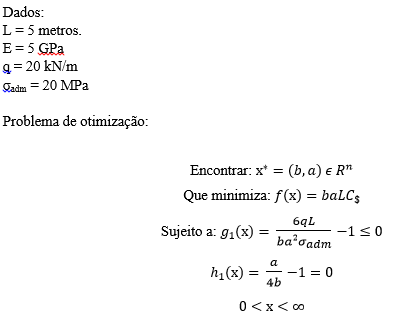

$h(x) = \frac{a}{4b}-1=0$

$g(x) = \frac{6qL}{ba^2\sigma_{adm}}-1\leq0$

In [12]:
import sympy as sy

q, L, b, a, sigma = sy.symbols('q L b a \sigma')

h = a/(4 * b) - 1
g = ((6 * q * L)/(b * a**2 * sigma) - 1)
g.diff(b)

-6*L*q/(\sigma*a**2*b**2)

In [3]:
L = 5
E = 5e9
q = 20e3
sigma = 20e6

# Função objetivo:
obj = lambda x: (x[0] * x[1] * L)

# Restrições:
cons = [{'type': 'eq', 'fun': lambda x: x[1]/(4 * x[0]) - 1},
        {'type': 'ineq', 'fun': lambda x: -((6 * q * L)/(x[0] * x[1]**2 * sigma) - 1)}
        ]

# Restrições de caixa:
bound = [(0, 0.3), (0, 0.7)]

# Gerar pontos iniciais:
#xi = generate_starting_points(1000)
#i1 = True
#for p in xi:
#    res = minimize(
#        obj,
#        [p[0], p[1]],
#        method='SLSQP',#'COBYLA',
#        constraints=cons,
#        bounds=bound
#        #options={'disp':True}
#    )
#
#    if i1:
#        better = False
#        best = res
#        bestxi = [p[0], p[1]]
#    else:
#        if res.success and res.fun < best.fun and res.fun > 0:
#            better = True
#            best = res
#            bestxi = [p[0], p[1]]

# Ponto de partida:
xi = [0.2, 0.4]

# Para obter os pontos x[0] e x[1] a cada iteração:
x1h = []
x2h = []
def callbackF(Xi):
    x1h.append(Xi[0])
    x2h.append(Xi[1])

best = minimize(
                obj,
                [xi],
                method='SLSQP',#'COBYLA',
                constraints=cons,
                bounds=bound,
                tol=1e-3,
                options={'disp':True},
                callback=callbackF
    )

# Exibe o resultado:
if best.success:
    print(f'Ótimo encontrado: b = {round(best.x[0], 6)}, a = {round(best.x[1], 6)}')
    print(f'Ponto inicial: {xi}')
else:
    print('Problema sem solução!')

# Adiciona os pontos iniciais ao histórico de convergência:
x1h = [xi[0]] + x1h
x2h = [xi[1]] + x2h

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3041042484342797
            Iterations: 4
            Function evaluations: 14
            Gradient evaluations: 4
Ótimo encontrado: b = 0.123308, a = 0.493244
Ponto inicial: [0.2, 0.4]


<ipython-input-4-ea251769e5f9>:10: RuntimeWarning: divide by zero encountered in true_divide
  h = x2/(4 * x1) - 1
<ipython-input-4-ea251769e5f9>:10: RuntimeWarning: invalid value encountered in true_divide
  h = x2/(4 * x1) - 1
<ipython-input-4-ea251769e5f9>:11: RuntimeWarning: divide by zero encountered in true_divide
  g = (6 * q * L)/(x1 * x2**2 * sigma) - 1


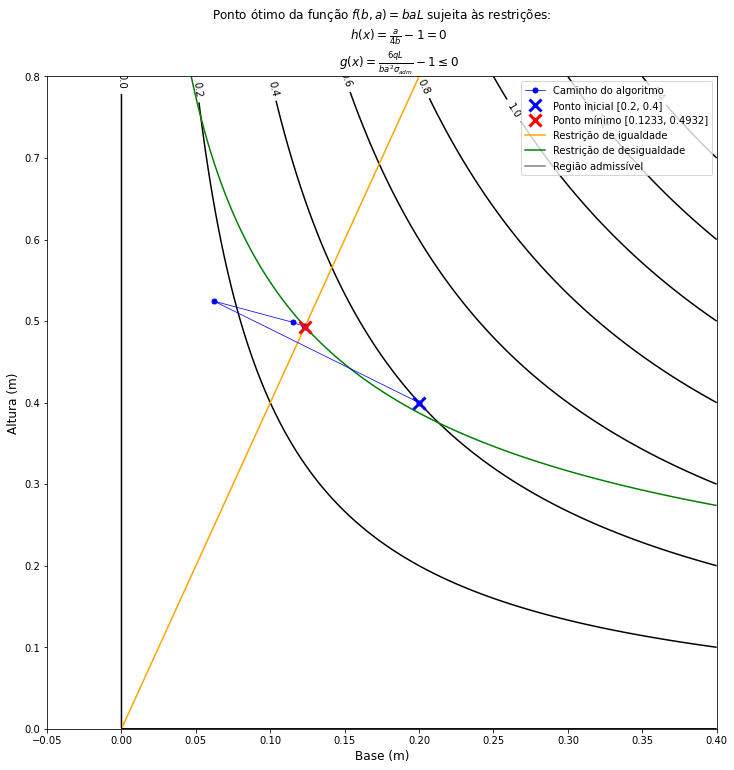

In [4]:
#### Plot:
plt.rc('figure', figsize=(12, 12))

valores = 1000
x = np.linspace(-0.05, 0.4, valores)
y = np.linspace(0, 0.8, valores)
x1, x2 = np.meshgrid(x, y)

f = x1 * x2 * L
h = x2/(4 * x1) - 1
g = (6 * q * L)/(x1 * x2**2 * sigma) - 1

fig, ax = plt.subplots()
title = (r'''Ponto ótimo da função $f(b, a) = baL$ sujeita às restrições:
         $h(x) = \frac{a}{4b}-1=0$
         $g(x) = \frac{6qL}{ba^2\sigma_{adm}}-1\leq0$''')
CS = ax.contour(x, y, f, 10, colors='k')
ax.clabel(CS, inline=0.5, fontsize=10)
ax.set_title(title)

string = f'Ponto mínimo [{round(best.x[0], 4)}, {round(best.x[1], 4)}]'
    
plt.plot(x1h, x2h, marker='.', lw=0.75, ms=10, label='Caminho do algoritmo', c='blue')
plt.plot(xi[0], xi[1], marker='x', ls='', ms=12, label=f'Ponto inicial {xi}', c='blue', mew=3)
plt.plot(best.x[0], best.x[1], marker='x', ls='', ms=12, label=string, c='r', mew=3)
plt.plot(0, 0, label='Restrição de igualdade', c='orange')
plt.plot(0, 0, label='Restrição de desigualdade', c='g')
plt.plot(0, 0, label='Região admissível', c='gray')
plt.contour(x, y, h, 0, colors='orange')
plt.contour(x, y, g, 0, colors='g')
plt.xlabel('Base (m)', fontsize=12)#, fontweight='bold')
plt.ylabel('Altura (m)', fontsize=12)#, fontweight='bold')

plt.legend()

plt.show()

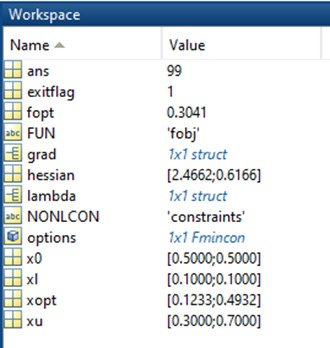